# Importing the data

In [1]:
# First we import the library we will need
import numpy as np
import pandas as pd
#from google.colab import drive
import tensorflow as tf
#import torch
#import torch.nn as nn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt

%matplotlib inline

In [2]:
# Define the file path and import the datas in a pandas dataframe named df
path = 'C:/Users/JF5191/Documents/DSTI/ML Python Labs/ML_PythonLabs/DOCKER_PYTHON/python_code/Churn_Modelling.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analysing the dataset

In [4]:
df.shape

(10000, 14)

In [5]:
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


we have 10 000 samples with 13 features (Rownumber is not considered as a usable feature)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is 3 categorical features (to be transformed later) and the remaining data are numerical features.
Let's now check if there is some missing values.

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Let's check the number of unique value.

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Let's do EDA in order to better understand the dataset

In [10]:
print(f"Ratio of people who churned: {round(len(df[df['Exited']== 1])/len(df),2)}")
print(f"Ratio of male in the dataset: {round(len(df[df['Gender']=='Male'])/len(df),2)}")
print(f"Ratio of male in the churned people: {round(len(df[(df['Gender']=='Male') & (df['Exited']==1)]) / len(df[df['Exited']==1]),2)}")

Ratio of people who churned: 0.2
Ratio of male in the dataset: 0.55
Ratio of male in the churned people: 0.44


It seems that women are more likely to churn that men (smaller ration in the global dataset but higher ratio in the churned people).
Let's now study the 'Geogrpahy' feature.

In [11]:
round(df['Geography'].value_counts()/len(df),2)

France     0.50
Germany    0.25
Spain      0.25
Name: Geography, dtype: float64

There is more data for France than for Germany and Spain... This will lead to use the stratify option in the train / test split function in order to keep the same ratio in the training phase.

Let's compare the distribution of the numerical features CreditScore, Age, Tenure, Balance and Estimated Salary

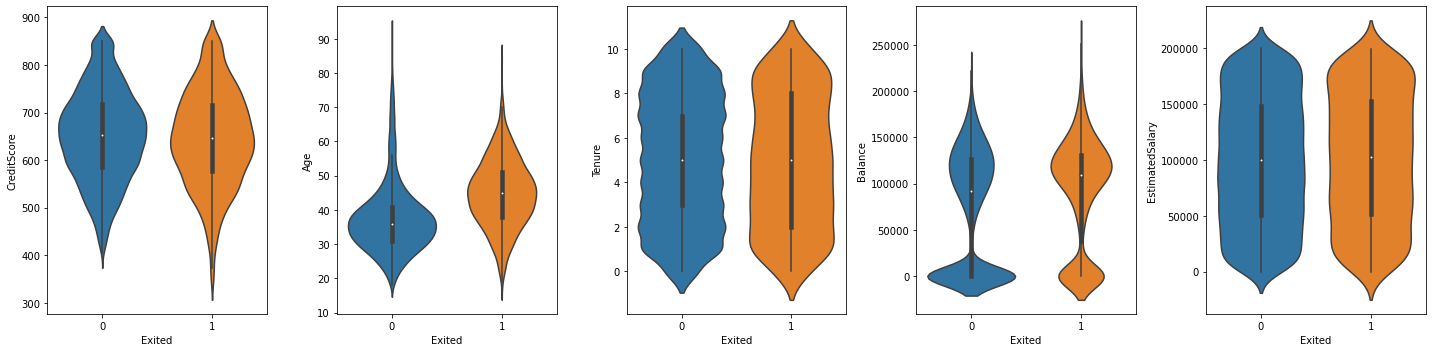

In [12]:
boxplot_col_names = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']
ncols = len(boxplot_col_names)
fig, axes = plt.subplots(1,ncols)
fig.set_size_inches(20,5)

for name, ax in zip(boxplot_col_names, axes.flatten()):
    sns.violinplot(y = name, x = "Exited" , data = df, orient = 'v', ax = ax)
plt.tight_layout()

The distributions above show that age and balance an have an impact on the churn:
- churners are older than non-churners (around 10 years older: median 45 vs 35),
- small balance are more likeky not to churn than high balance.

Let's now check the categorical or binary features: NumOfProducts, HasCrCard and IsActiveMember

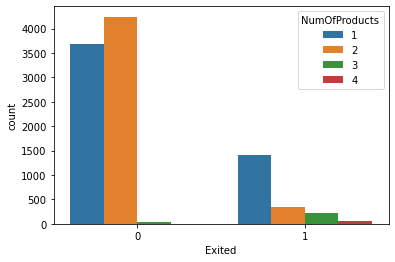

In [13]:
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = df);

In [15]:
print(f"# of product ratio for people who have NOT churned: \n{round(df[df['Exited']==0]['NumOfProducts'].value_counts() / len(df[df['Exited']==0]),2)}")

# of product ratio for people who have not churned: 
2    0.53
1    0.46
3    0.01
Name: NumOfProducts, dtype: float64


In [16]:
print(f"# of product ratio for people who have churned: \n{round(df[df['Exited']==1]['NumOfProducts'].value_counts() / len(df[df['Exited']==1]),2)}")

# of product ratio for people who have churned: 
1    0.69
2    0.17
3    0.11
4    0.03
Name: NumOfProducts, dtype: float64


People with 1, 3 and 4 products are more likely to churn than people with 2 products due to the ratio change.

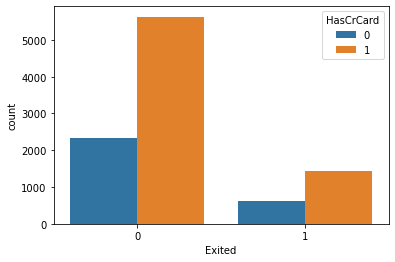

In [75]:
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = df);

In [18]:
print(f"Ratio of people having NOT churned and a credit card\n{round(df[df['Exited']==0]['HasCrCard'].value_counts() / len(df[df['Exited']==0]),2)}")

Ratio of people having not churned and a credit card
1    0.71
0    0.29
Name: HasCrCard, dtype: float64


In [20]:
print(f"Ratio of people having churned and a credit card\n{round(df[df['Exited']==1]['HasCrCard'].value_counts() / len(df[df['Exited']==1]),2)}")

Ratio of people having churned and a credit card
1    0.7
0    0.3
Name: HasCrCard, dtype: float64


Credit card seems to have a very low impact the ratio being the same for churned and not churned people.

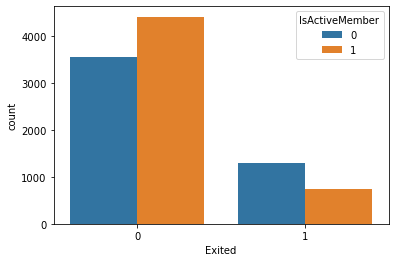

In [78]:
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df);

In [24]:
print(f"Ratio of people having NOT churned and are active\n{round(df[df['Exited']==0]['IsActiveMember'].value_counts() / len(df[df['Exited']==0]),2)}")

Ratio of people having NOT churned and are active
1    0.55
0    0.45
Name: IsActiveMember, dtype: float64


In [25]:
print(f"Ratio of people having churned and are active\n{round(df[df['Exited']==1]['IsActiveMember'].value_counts() / len(df[df['Exited']==1]),2)}")

Ratio of people having churned and are active
0    0.64
1    0.36
Name: IsActiveMember, dtype: float64


People non active seems to be more likely to churn (increasing ratio)

# Modelling


We map the gender columns as a binary value because we can't use an object/categorical data as an input for the model.
We also one-hot encode the Geography feature so that we can use these categorical features in a model.

We then remove the unneeded columns ('RowNumber','CustomerId','Surname': because they are not usabel for the model, 'Exited' because it is the label (Y)  and 'Geography' because we just one-hot encoded it) and create the X dataset and the label dataset (Y) (we are working on a supervised model).

In [27]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1}) # mapping gender
df = pd.concat([df,pd.get_dummies(df['Geography'], prefix = 'country',
              drop_first= True)], axis = 1) # One-hot encoding Geography feature

df_X = df.drop(['Geography','Exited','RowNumber','CustomerId','Surname'],
            axis = 1)
X = df_X.values # creating X dataset
Y = df['Exited'].values # creating Y label

Now we split the datas in train / test  dataset using stratification due to unbalanced dataset over Geography and Gender for ex.

In [28]:
#split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                        random_state = 10, stratify=Y)
# we use random_state to make sure spliting contains the same data each time
# (the train/test dataset will have the same rows each time)

In [29]:
Y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
# standardize the data (x_standardised = (x - x_mean)/std_dev)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # we use the scale set calculated from the
# training set just above and we apply it to transform the test set

Let's try ANN with tensorflow

In [31]:
model = tf.keras.models.Sequential()

#add input layer  and first hidden layer
model.add(tf.keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) #initializer=uniform means to all the weights will initialized with the same value

#xxx.Dense means that every node is connected with the nodes next to himself

#add 2nd hidden layer
model.add(tf.keras.layers.Dense(units = 6, kernel_initializer='uniform', activation = 'relu'))

# Add output layer
model.add(tf.keras.layers.Dense(units = 1, kernel_initializer='uniform', activation='sigmoid')) # sigmoid for binary, Softmax for multiclass

# compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training
history = model.fit(X_train, Y_train, batch_size  = 10, epochs = 10, verbose = 2)

Epoch 1/10
800/800 - 1s - loss: 0.4828 - accuracy: 0.8010 - 1s/epoch - 1ms/step
Epoch 2/10
800/800 - 1s - loss: 0.4080 - accuracy: 0.8235 - 1s/epoch - 1ms/step
Epoch 3/10
800/800 - 1s - loss: 0.3937 - accuracy: 0.8298 - 780ms/epoch - 975us/step
Epoch 4/10
800/800 - 1s - loss: 0.3843 - accuracy: 0.8319 - 644ms/epoch - 805us/step
Epoch 5/10
800/800 - 1s - loss: 0.3774 - accuracy: 0.8317 - 638ms/epoch - 797us/step
Epoch 6/10
800/800 - 1s - loss: 0.3716 - accuracy: 0.8435 - 639ms/epoch - 799us/step
Epoch 7/10
800/800 - 1s - loss: 0.3679 - accuracy: 0.8489 - 643ms/epoch - 803us/step
Epoch 8/10
800/800 - 1s - loss: 0.3648 - accuracy: 0.8493 - 642ms/epoch - 803us/step
Epoch 9/10
800/800 - 1s - loss: 0.3612 - accuracy: 0.8524 - 636ms/epoch - 795us/step
Epoch 10/10
800/800 - 1s - loss: 0.3599 - accuracy: 0.8520 - 967ms/epoch - 1ms/step


In [24]:
y_ann_pred = model.predict(X_test)
y_ann_pred = (y_ann_pred > 0.5)
cm_ann = confusion_matrix(y_ann_pred, Y_test)

accuracy_ann = round(model.evaluate(X_test, Y_test, verbose = False)[1],2)

print(cm_ann)
print(accuracy_ann)

63/63 [==============================] - 0s 1ms/step
[[1534  206]
 [  59  201]]
0.87


Let's try logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # create the model
logisticRegr.fit(X_train, Y_train.reshape(8000)) # train the model

accuracy_log = logisticRegr.score(X_test, Y_test)

print(f'Logistic regression accuracy: {accuracy_log}')

Logistic regression accuracy: 0.812


In [26]:
y_log_pred = logisticRegr.predict(X_test)
cm_logistic = confusion_matrix(y_log_pred, Y_test)
cm_logistic

array([[1536,  319],
       [  57,   88]], dtype=int64)

This model is less accurate than the ANN.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # create the model
knn.fit(X_train, Y_train.reshape(8000)) # train the model

accuracy_knn = knn.score(X_test, Y_test)
print(f'KNN accuracy: {accuracy_knn}')


y_knn_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_knn_pred, Y_test)
print(cm_knn)


KNN accuracy: 0.8355
[[1522  258]
 [  71  149]]


Let's try a decision tree, naive bayes, support vector machine

We finally choose the ANN model because it gives more accurate predictions